### 📦 Importing Required Libraries
We begin by importing necessary libraries such as NumPy for numerical operations and warnings to handle unnecessary warnings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

### 📂 Loading the Dataset
We load the transaction dataset from a CSV file for further analysis.


In [3]:
df = pd.read_csv("AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 🧾 Exploring the Dataset
Displaying dataset information and listing all the column names.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### 🎯 Class Distribution
Checking the distribution of target labels `isFraud` and `isFlaggedFraud` to understand class imbalance.


In [4]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [5]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

### 🧹 Missing Values and Dataset Size
Checking for missing values and counting the number of rows (transactions) in the dataset.


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.shape[0]

6362620

### 📊 Percentage of Fraudulent Transactions
Calculating the percentage of transactions that are labeled as fraud.


In [6]:
round((df["isFraud"].value_counts()[1]/ df.shape[0]) * 100,2)

np.float64(0.13)

### 🏷️ Transaction Types
Visualizing the different types of transactions in the dataset.


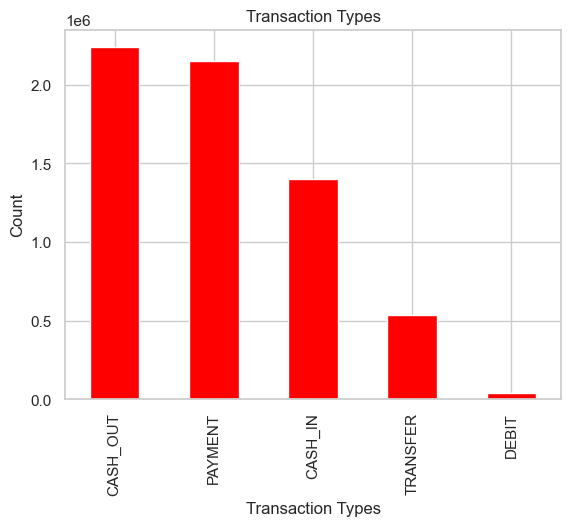

In [7]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="red")
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.show()

### 🔍 Fraud Rate by Transaction Type
Analyzing the average fraud rate for each transaction type.


<function matplotlib.pyplot.show(close=None, block=None)>

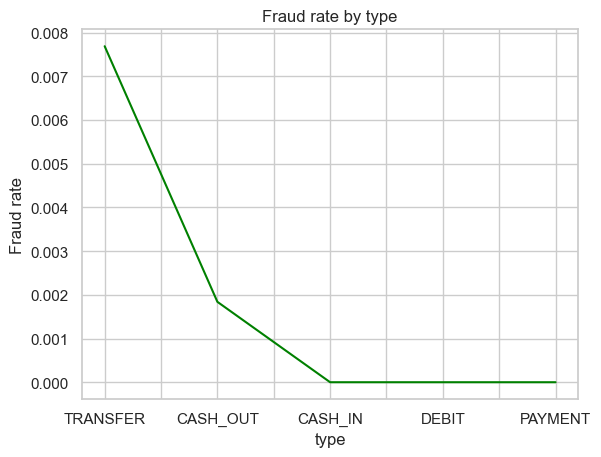

In [8]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="line", title="Fraud rate by type", color="green")
plt.ylabel("Fraud rate")
plt.show

### 💰 Transaction Amount Analysis
Statistical summary and histogram plot of transaction amounts (log scale) to analyze distribution.


In [9]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

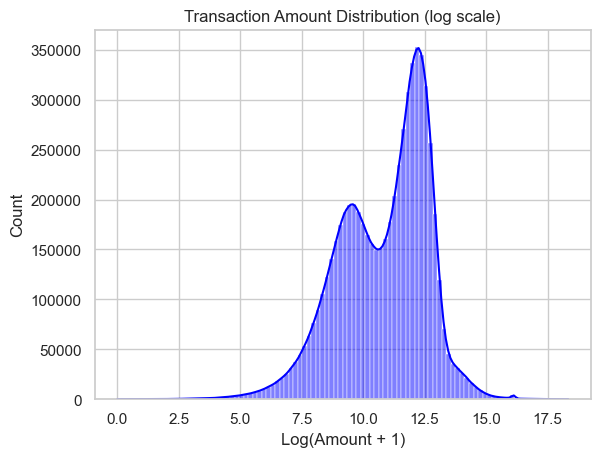

In [10]:
sns.histplot(np.log1p(df["amount"]),bins=100, kde=True, color="blue")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

### 📦 Boxplot: Fraud vs. Transaction Amount
Visualizing transaction amount distributions by fraud class using a boxplot.


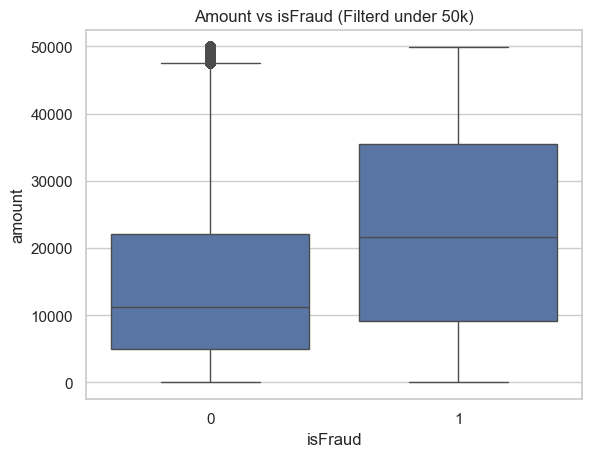

In [11]:
sns.boxplot(data= df[df["amount"] < 50000], x = "isFraud", y="amount")
plt.title("Amount vs isFraud (Filterd under 50k)")
plt.show()

In [12]:
df["balancedDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balancedDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [13]:
(df["balancedDiffOrig"] < 0).sum()

np.int64(1399253)

In [14]:
(df["balancedDiffDest"] < 0).sum()

np.int64(1238864)

In [15]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


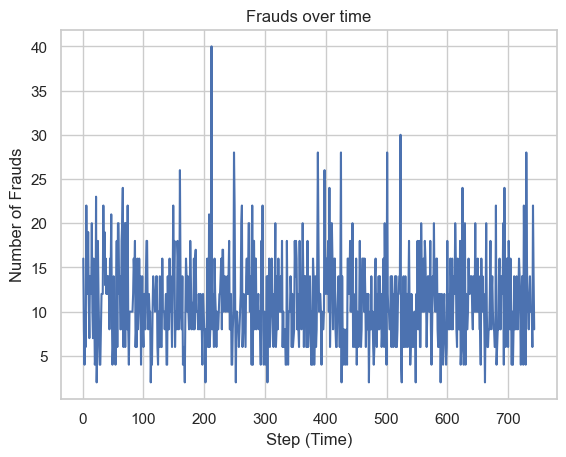

In [21]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Fraud by step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()

### 🧺 Data Cleaning
Dropping the `step` column as it is not useful for fraud detection.


In [17]:
df.drop(columns="step", inplace=True)

### 🔍 Preview Updated Dataset
Displaying the first few rows after dropping irrelevant columns.


In [18]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


### 👤 Top Users
Finding the most frequent senders and receivers in the dataset.


In [19]:
top_senders = df["nameOrig"].value_counts().head(10)

In [20]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [21]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

### 🧑‍💻 Frequent Fraudulent Senders
Listing top users associated with fraudulent transactions.


In [22]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

### 🔎 Focus on High-Risk Transaction Types
Filtering transactions to focus on 'TRANSFER' and 'CASH_OUT' types which are more prone to fraud.


In [23]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [24]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

### 📊 Fraud Count by Transaction Type
Plotting fraud vs non-fraud counts for each high-risk transaction type.


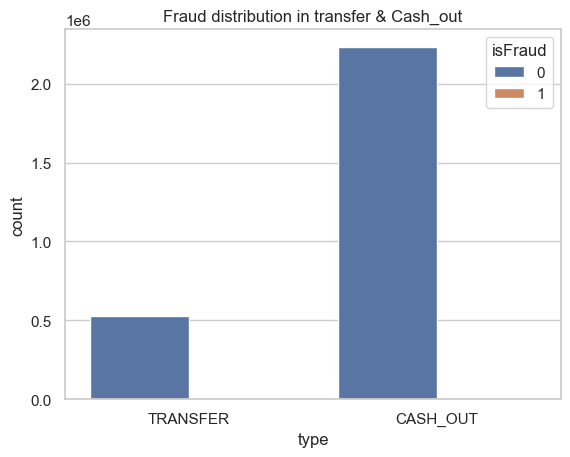

In [25]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud distribution in transfer & Cash_out")
plt.show()

### 🔗 Feature Correlation Heatmap
Analyzing correlations between numerical features and the fraud label using a heatmap.


In [26]:
corr = df[["amount", "oldbalanceOrg","newbalanceOrig","oldbalanceDest", "newbalanceDest", "isFraud"]]

In [27]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0
1,1864.28,21249.00,19384.72,0.00,0.00,0
2,181.00,181.00,0.00,0.00,0.00,1
3,181.00,181.00,0.00,21182.00,0.00,1
4,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,850002.52,850002.52,0.00,0.00,0.00,1


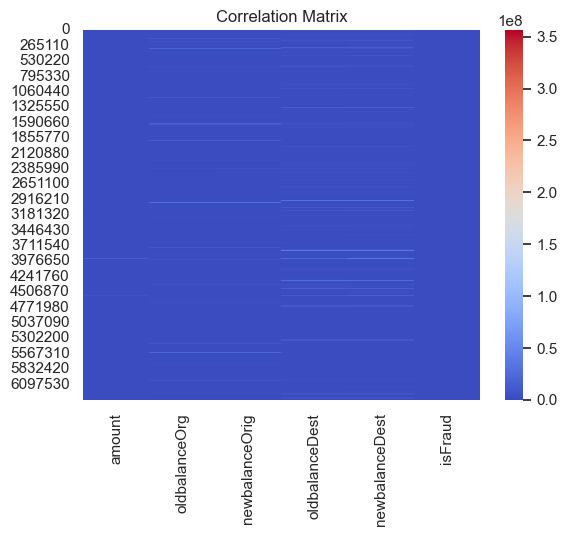

In [30]:
sns.heatmap(corr, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 🧾 Zero Balance Transfers
Identifying suspicious transfers where the destination balance remains zero despite a transaction occurring.


In [31]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [33]:
len(zero_after_transfer)

1188074

In [34]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [35]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### 🧪 Preparing Data for Model Training
Splitting data into features and labels, and preparing for model training.


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedDiffOrig,balancedDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


### 🧼 Feature Selection
Removing non-contributing or identifier columns before training the machine learning model.


In [41]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis = 1)


In [43]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedDiffOrig,balancedDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


### 🔤 Encoding Categorical Variables
Converting categorical transaction types to numerical format using one-hot encoding.


In [44]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [47]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)

### 🧪 Train-Test Split
Splitting the dataset into training and testing sets for evaluation.


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

### 🛠️ Data Preprocessing with ColumnTransformer
Setting up a preprocessing pipeline that standardizes numerical features and one-hot encodes categorical variables.


In [50]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(),numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

### ⚙️ Machine Learning Pipeline
Combining preprocessing and logistic regression into a single pipeline for streamlined training and prediction.

In [51]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### 🧾 Classification Report
Making predictions on the test set and evaluating model performance using precision, recall, f1-score, and support.


In [54]:
y_pred = pipeline.predict(X_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



### 📊 Confusion Matrix and Accuracy
Displaying the confusion matrix and calculating the model’s accuracy percentage on the test data.


In [58]:
confusion_matrix(y_test, y_pred)

array([[1801756,  104566],
       [    147,    2317]])

In [60]:
pipeline.score(X_test, y_test) * 100

94.51415716586354

### 💾 Save the Model
Saving the entire pipeline as a `.pkl` file using `joblib` for later use in deployment or the Streamlit web application.


In [61]:
import joblib

joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']